# Introdução ao projeto

Como parte de nossas funções em uma startup que vende produtos alimentícios, fomos encarregados de analisar o comportamento dos usuários no aplicativo da empresa. Nosso foco inicial é estudar o funil de vendas e entender como os usuários avançam até a etapa de compra. Quantos usuários realmente chegam a essa etapa? Quantos ficam presos em fases anteriores e quais são essas etapas específicas?

Em seguida, iremos examinar os resultados de um teste A/A/B. (Continue lendo para obter mais informações sobre testes A/A/B.) Nossos designers gostariam de alterar as fontes em todo o aplicativo, mas nossos gerentes estão preocupados que os usuários possam achar o novo design intimidador. Para tomar a decisão, decidimos confiar nos resultados de um teste A/A/B.

Dividimos os usuários em três grupos: dois grupos de controle receberão as fontes antigas e um grupo de teste receberá as novas. Nossa tarefa é determinar qual conjunto de fontes produz melhores resultados.

A criação de dois grupos de controle possui certas vantagens. Podemos estabelecer o princípio de que só teremos confiança na precisão de nossos testes quando os dois grupos de controle forem semelhantes. Se houver diferenças significativas entre os grupos de controle, isso pode nos ajudar a identificar fatores que podem distorcer os resultados. Além disso, a comparação entre os grupos de controle nos informa sobre o tempo e a quantidade de dados necessários ao conduzir testes futuros.

Para nossa análise, utilizaremos o mesmo conjunto de dados tanto para a análise geral quanto para a análise A/A/B. Em projetos reais, realizamos experimentos constantemente, e nossos analistas estudam a qualidade de um aplicativo usando dados gerais, sem focar na participação dos usuários nos experimentos.

# Step a Step do Projeto

Neste projeto, iremos mergulhar profundamente nos dados de comportamento do usuário de uma startup que vende produtos alimentícios. O nosso principal objetivo é entender como os usuários interagem com o aplicativo da empresa e, especificamente, como eles navegam pelo funil de vendas.

Em primeiro lugar, iremos analisar o funil de vendas para descobrir a jornada que os usuários percorrem até chegar ao ponto de compra. Quantos usuários chegam ao estágio final de compra? Quantos ficam retidos em fases anteriores do funil? Que estágios, em particular, parecem ser os gargalos no processo?

Em segundo lugar, avaliaremos os resultados de um teste A/A/B projetado para informar decisões de design do aplicativo. A equipe de design está considerando uma mudança de fontes em todo o aplicativo, mas há preocupações de que a nova fonte possa ser intimidante para os usuários. Para tomar uma decisão fundamentada, decidimos testar a nova fonte com um grupo de teste, enquanto dois grupos de controle continuam a ver as fontes antigas. Compararemos os resultados para determinar qual conjunto de fontes leva a melhores resultados.


**Descrição dos Dados**

Os dados que iremos analisar vêm na forma de um registro de eventos do usuário, com cada entrada correspondendo a uma ação ou evento específico. Os dados contêm as seguintes colunas:

* EventName — Nome do evento.
* DeviceIDHash — Identificador de usuário único.
* EventTimestamp — Hora do evento.
* ExpId — Número do experimento: 246 e 247 são os grupos de controle, 248 é o grupo de teste.


**Plano do Projeto**

A análise será realizada nas seguintes etapas:

Passo 1: Abrir e entender os dados

Passo 2: Preparar os dados para análise, incluindo renomeação de colunas, tratamento de valores ausentes e adição de colunas de data e hora.

Passo 3: Análise exploratória dos dados para entender a distribuição de eventos e usuários e o período de tempo coberto pelos dados.

Passo 4: Estudar o funil de eventos para entender a jornada do usuário através do aplicativo e identificar pontos de atrito potenciais.

Passo 5: Avaliar os resultados do teste A/A/B para determinar se uma mudança na fonte levaria a uma melhor interação do usuário.

Os resultados desta análise serão usados para informar as decisões estratégicas sobre o design do aplicativo e a experiência geral do usuário.

## Importação dos nossos dados e carregamento das bases

Iremos carregar as bibliotecas que iremos usar para gerar as análises e gráficos.

Iremos explicar cada um dos usos das bibliotecas:

pandas --> análise de dados;
numpy --> geração de gráficos e auxílio ao pandas;
matplotlib.pyplot --> geração de gráficos
Após isso iremos abrir nossos dados em diferentes seções e analisar a qualidade das bases e realizar as correções devidas em cada uma das seções como pré-análise de dados e processamento de base.

In [329]:
# Carregando nossas bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

## Base visits_log_us.csv e carregamento de dados

Como observado anteriormente iremos abrir a base de dados logs_exp_us.csv realizando uma pré-análise de dados, processamento do dado e possível limpeza, indicando os erros e as mudanças.

In [330]:
# abrindo a tabela logs_exp_us.csv

# Carregando dados no computador pessoal
try:
    df = pd.read_csv(r'/Downloads/logs_exp_us.csv', sep = '\t')
    
# Carregando dados no JupyterHub
except:
    df = pd.read_csv(r'/datasets/logs_exp_us.csv', sep = '\t')

In [331]:
# mostrando a df 
df_visits.head(5)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [332]:
# informações gerais da df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


**Conclusão Intermediária**

Nossos dados estão formatados com algumas observações, sendo:

* As colunas estão em CamelCase e não snake_case. Iremos alterar
* Aparentemente não existem valores nulos. Iremos analisar cada coluna para entender os valores únicos.
* Iremos renomear as colunas para melhor entendimento das mesmas.
* Vamos analisar por duplicatas implicitas.
* Precisamos alterar a coluna EventTimestamp para o formato de Data.

In [333]:
# Renomeando as colunas:
df = df.rename(columns={'EventName': 'nome_evento',
                        'DeviceIDHash': 'id_unico',
                        'EventTimestamp': 'hora',
                        'ExpId': 'num_exp'})

# Visualizar o DataFrame com as colunas renomeadas
df   v

,nome_evento,id_unico,hora,num_exp
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


## Exploração de dados de df

Iremos analisar cada uma das colunas com o intuito de analisar a procedência e veracidade dos dados. Além disso, vamos procurar por duplicadas implícitas, analisar o frame de datas também.

De primeiro momento, já padronizamos as colunas para snake_case anteriormente e agora iremos trabalhar com as colunas de nossa DataFrame.

### Dados na coluna nome_evento

Vamos analisar os eventos distintos e analisar se existem duplicatas implícitas em nossos dados. Também iremos analisar a contagem e soma dos diferentes tipos de eventos.

In [334]:
# Gerando lista de eventos
evento = list(df['nome_evento'].unique())

# Mostrando eventos
evento

['MainScreenAppear',
 'PaymentScreenSuccessful',
 'CartScreenAppear',
 'OffersScreenAppear',
 'Tutorial']

In [335]:
# Contagem dos eventos
df['nome_evento'].value_counts()

MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: nome_evento, dtype: int64

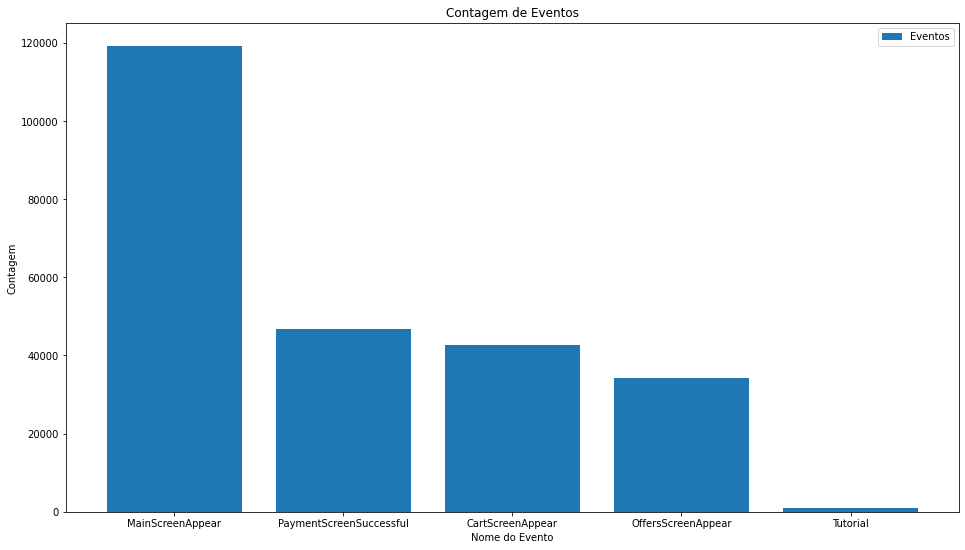

In [336]:
# Dados do gráfico
x = df['nome_evento'].unique()
y = df['nome_evento'].value_counts()

# Configurar tamanho da figura para 16:9
plt.figure(figsize=(16, 9))

# Plotar gráfico de barras
plt.bar(x, y)

# Configurar nome dos eixos
plt.xlabel('Nome do Evento')
plt.ylabel('Contagem')

# Configurar título do gráfico
plt.title('Contagem de Eventos')

# Configurar legenda
plt.legend(['Eventos'])

# Exibir o gráfico
plt.show()

**Conclusão Intermediária**

Ao analisar vemos que:

* Os dados da coluna não possuem dados com duplicatas implícitas;
* Podemos ver o fenomeno de um funil de visitantes em uma página com vendas.
* O funil começa com a entrada na págna principal e vai estreitando até a conversão onde se inicia o Tutorial.

Não é necessário a alteração de nenhum padrão para a coluna.

### Dados na coluna id_unico

Vamos analisar o número de ids e únicos.

In [337]:
df['id_unico'].nunique()

7551

**Conclusão Intermediária**

Pode-se observar que existem 7551 usuários no teste realizado.

Desse teste, ainda, teremos que observar nos próximos passos se existem usuários com id_únicos em mais de um grupo.

### Dados na coluna hora

Iremos alterar o tipo da coluna de TimeStamp fornecido para o tipo correto.

Ao que indica, a coluna hora representa os segundos de contagem, assim iremos realizar as alterações pertinentes.

In [338]:
# Converter a coluna "hora" em um formato de data
df['hora'] = pd.to_datetime(df['hora'], unit='s')

# Visualizar o DataFrame com a coluna "hora" convertida
df

,nome_evento,id_unico,hora,num_exp
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246


In [339]:
# Encontrar o valor máximo e mínimo da coluna "hora"
valor_maximo = df['hora'].max()
valor_minimo = df['hora'].min()

# Exibir os valores máximo e mínimo
print('Valor máximo:', valor_maximo)
print('Valor mínimo:', valor_minimo)

Valor máximo: 2019-08-07 21:15:17
Valor mínimo: 2019-07-25 04:43:36


In [340]:
# diferença de dias
print(valor_maximo - valor_minimo)

13 days 16:31:41


**Conclusão Intermediária**

Pode-se observar que:

* Os dados estavam no tipo de TimeStamp de segundos e ao fazer a alteração pertinente se coletou as datas corretamente.
* A data mínima é 2019-07-25
* A data final é 2019-08-07
* O teste durou aproxidamente 13 dias

Iremos adicionar uma coluna com a data para melhor trabalhar com os dados posteriormente.

In [341]:
# criando coluna com data
df['data'] = df['hora'].dt.date

df

,nome_evento,id_unico,hora,num_exp,data
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


### Dados na coluna num_exp

Iremos analisar quais os numeros dos experimentos realizados.

Também iremos analisar se existem usuários em diferentes grupos e iremos tratar esses dados.

In [342]:
# Experimentos realizados
df['num_exp'].unique()

array([246, 248, 247])

In [343]:
df

,nome_evento,id_unico,hora,num_exp,data
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


In [344]:
# Encontrar id_unicos em mais de um grupo na coluna "num_exp"
usuarios_multiplos_grupos = df.groupby('id_unico')['num_exp'].nunique()
usuarios_multiplos_grupos = usuarios_multiplos_grupos[usuarios_multiplos_grupos > 1]

# Mostrar dados
usuarios_multiplos_grupos

Series([], Name: num_exp, dtype: int64)

**Conclusão Intermediária**

Podemos tirar que:

* Os grupos de testes são o 246, 247 e 248;
* Não existem usuários inseridos mais de 1 grupo diferente então não necessita-se de limpeza posterior;
* Vamos analisar como está feita a separação, ou seja, quanto usuários em cada grupo;

In [345]:
# Calculando o número de usuários para cada grupo
usuarios_unicos_por_grupo = df.groupby('num_exp')['id_unico'].nunique()

# Mostrando
usuarios_unicos_por_grupo

num_exp
246    2489
247    2520
248    2542
Name: id_unico, dtype: int64

Para esss tipo de teste precisamos ter o mesmo número de amostras para todos os grupos para que não haja discrepâncias para os testes realizados. Logo iremos padronizar para ter o número de usuários do grupo 246 excluindo os de menor relevância para os grupos 247, ou seja, os que acessaram somente 1 vez a página.

Tal procedimento iremos realizar posteriormente juntamente com a análise de datas relevantes para o nosso teste.

**Conclusão**

Em resumo, com base nas conclusões intermediárias apresentadas:

Os grupos de testes são 246, 247 e 248, sem usuários inseridos em mais de um grupo.
Os dados de data foram corrigidos, abrangendo um período de aproximadamente 13 dias.
Existem 7.551 usuários no teste realizado.
Não há duplicatas implícitas nos dados analisados.
Observou-se um funil de visitantes em uma página com vendas.
Serão feitas alterações nas colunas, incluindo renomeação e ajuste de formato.
Não foram identificados valores nulos.
A transformação da coluna EventTimestamp para o formato de data é necessária.
Essas conclusões fornecem um panorama sobre os dados e orientam as próximas etapas da análise.

## Estudo e verificação dos dados

Nessa seção iremos realizar uma série de estudos e verificações de nossos dados. Passaremos pelas seguintes análises:

* Quantos eventos temos nos diários?
* Quantos usuários temos nos diários?
* Qual é o número médio de eventos por usuário?
* Qual é o período de tempo que nossos dados cobrem? Encontremos a data máxima e mínima. Vamos desenhar um histograma por data e hora. Podemos ter certeza de que possuímos dados igualmente completos para todo o período? Os eventos mais antigos podem acabar aparecendo nos diários de alguns usuários por motivos técnicos, e isso pode distorcer o quadro geral. Vamos encontrar o momento em que nossos dados começam a ser completos e ignorar a seção anterior. Qual período nossos dados realmente representam?
* Perdemos muitos eventos e usuários ao excluir os dados mais antigos?
* Vamos garantir que tenhamos usuários de todos os três grupos experimentais.

### Quantos eventos ficam nos diários?

In [346]:
# Convertendo a coluna 'data' para o tipo de dados datetime
df['data'] = pd.to_datetime(df['data'])

# Contando o número de eventos por dia
eventos_diarios = df.groupby(df['data'].dt.date).size()

eventos_diarios

data
2019-07-25        9
2019-07-26       31
2019-07-27       55
2019-07-28      105
2019-07-29      184
2019-07-30      413
2019-07-31     2031
2019-08-01    36229
2019-08-02    35606
2019-08-03    33351
2019-08-04    33033
2019-08-05    36113
2019-08-06    35822
2019-08-07    31144
dtype: int64

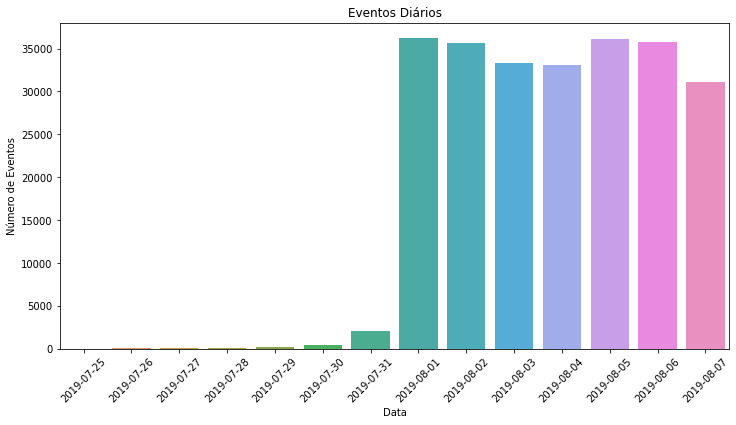

In [347]:
# Converter a série de eventos diários em um DataFrame
df_eventos_diarios = eventos_diarios.reset_index(name='count')

# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='data', y='count', data=df_eventos_diarios)
plt.xticks(rotation=45)
plt.xlabel('Data')
plt.ylabel('Número de Eventos')
plt.title('Eventos Diários')
plt.show()

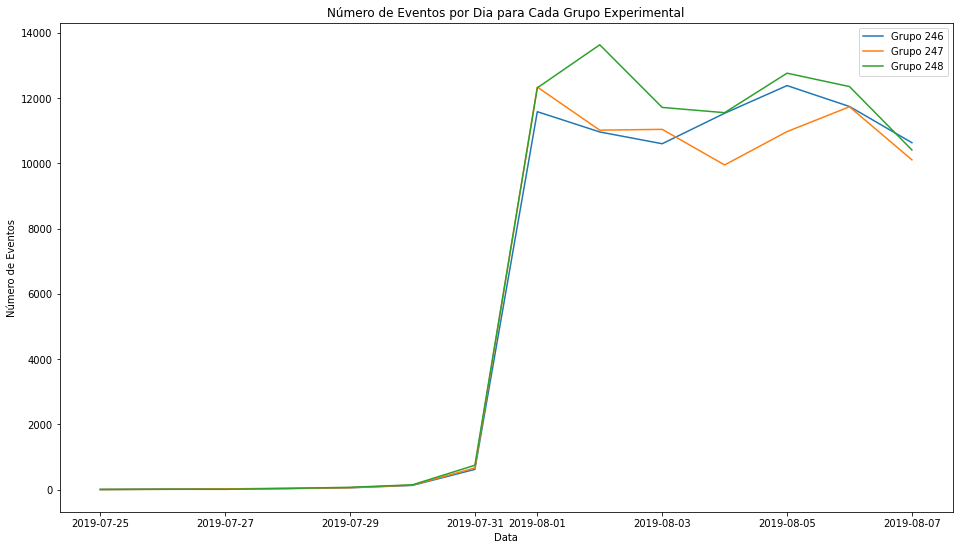

In [348]:
# Agrupando os dados por data e 'num_exp' e contando o número de eventos
eventos_diarios_por_grupo = df.groupby([df['data'].dt.date, 'num_exp']).size().reset_index(name='contagem')

# Configurar tamanho da figura para 16:9
plt.figure(figsize=(16, 9))

# Criando um gráfico de linhas para cada grupo
for grupo in eventos_diarios_por_grupo['num_exp'].unique():
    dados_do_grupo = eventos_diarios_por_grupo[eventos_diarios_por_grupo['num_exp'] == grupo]
    plt.plot(dados_do_grupo['data'], dados_do_grupo['contagem'], label=f'Grupo {grupo}')

plt.xlabel('Data')
plt.ylabel('Número de Eventos')
plt.legend()
plt.title('Número de Eventos por Dia para Cada Grupo Experimental')
plt.show()

**Conclusão**

* Percebe-se que há um claro cresciemento de usuários após a data do 31/07;

* Esse crescimento alto pode ser erro na base, ou a divulgação de marketing por algum canal específico.

* Há um número de eventos que é crescente com um máximo de 3922 eventos por dia totais

### Quantos usuários ficam nos diários?

Iremos considerar o número médio de usuários únicos que acessam para essa análise e número médio de usuários em geral.

In [349]:
# Contando o número de usuários únicos por dia
usuarios_diarios = df.groupby(df['data'].dt.date)['id_unico'].nunique()

usuarios_diarios

data
2019-07-25       7
2019-07-26      22
2019-07-27      39
2019-07-28      69
2019-07-29     135
2019-07-30     296
2019-07-31     924
2019-08-01    3703
2019-08-02    3647
2019-08-03    3482
2019-08-04    3527
2019-08-05    3802
2019-08-06    3922
2019-08-07    3651
Name: id_unico, dtype: int64

Número médio de usuários por dia:  1944.7142857142858
          data  num_exp  contagem
0   2019-07-25      246         4
1   2019-07-25      247         1
2   2019-07-25      248         2
3   2019-07-26      246         7
4   2019-07-26      247         7
5   2019-07-26      248         8
6   2019-07-27      246        14
7   2019-07-27      247        17
8   2019-07-27      248         8
9   2019-07-28      246        26
10  2019-07-28      247        25
11  2019-07-28      248        18
12  2019-07-29      246        44
13  2019-07-29      247        41
14  2019-07-29      248        50
15  2019-07-30      246        93
16  2019-07-30      247        96
17  2019-07-30      248       107
18  2019-07-31      246       285
19  2019-07-31      247       314
20  2019-07-31      248       325
21  2019-08-01      246      1191
22  2019-08-01      247      1282
23  2019-08-01      248      1230
24  2019-08-02      246      1197
25  2019-08-02      247      1221
26  2019-08-02      248     

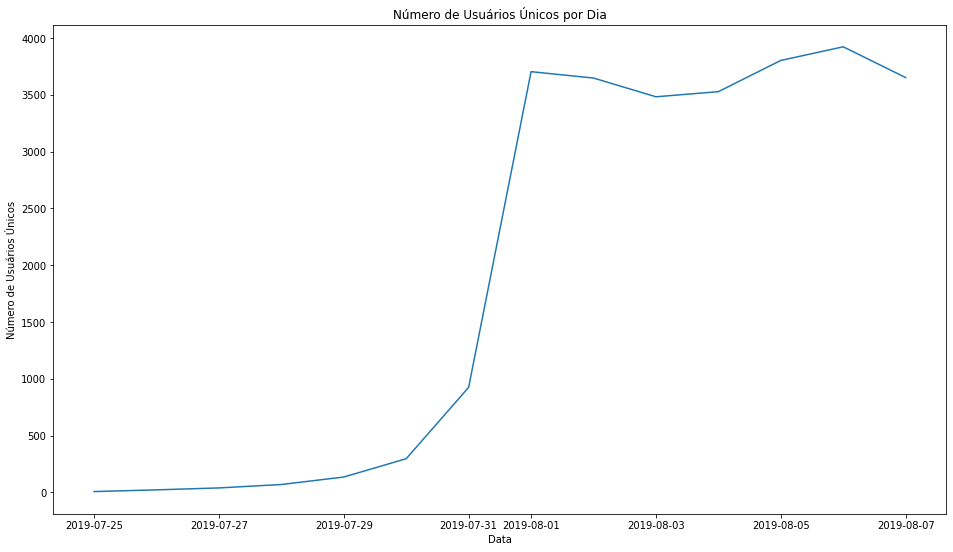

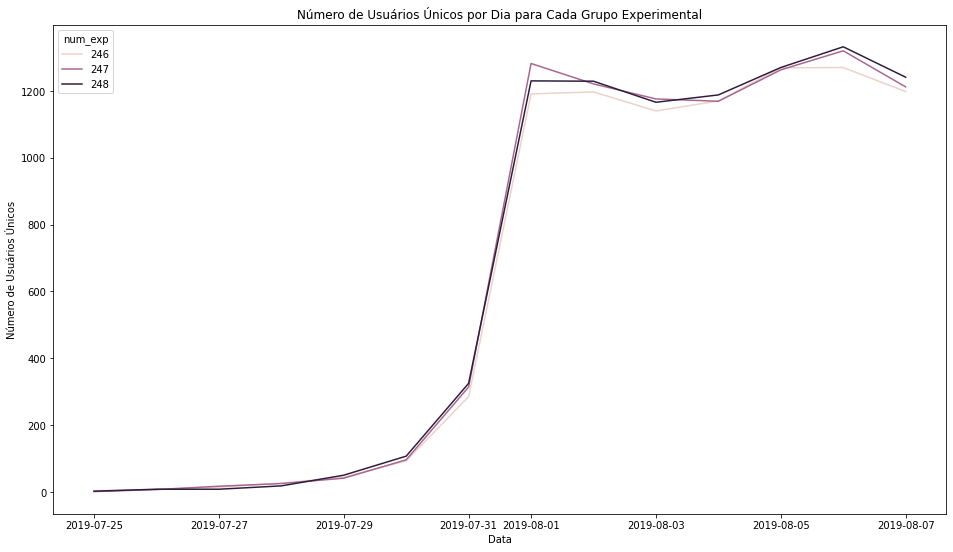

In [350]:
# Contando o número de usuários únicos por dia
usuarios_diarios = df.groupby(df['data'].dt.date)['id_unico'].nunique()

# Contando o número de usuários únicos por dia para cada grupo
usuarios_diarios_por_grupo = df.groupby([df['data'].dt.date, 'num_exp'])['id_unico'].nunique().reset_index(name='contagem')

# Criando a tabela com os números
print("Número médio de usuários por dia: ", usuarios_diarios.mean())
print(usuarios_diarios_por_grupo)

# Plotando o gráfico geral com seaborn
plt.figure(figsize=(16, 9))
sns.lineplot(data=usuarios_diarios)
plt.xlabel('Data')
plt.ylabel('Número de Usuários Únicos')
plt.title('Número de Usuários Únicos por Dia')
plt.show()

# Plotando o gráfico para cada grupo com seaborn
plt.figure(figsize=(16, 9))
sns.lineplot(data=usuarios_diarios_por_grupo, x='data', y='contagem', hue='num_exp')
plt.xlabel('Data')
plt.ylabel('Número de Usuários Únicos')
plt.title('Número de Usuários Únicos por Dia para Cada Grupo Experimental')
plt.show()

**Conclusão**

Com base nos dados encontrados, podemos destacar as seguintes conclusões:

1. Número médio de usuários por dia: 1944.71 - Calculando a média do número de usuários por dia, verificamos que, em média, tivemos cerca de 1944 usuários diários ao longo do período analisado.

2. Distribuição dos eventos por grupo experimental: Observamos que ao longo dos dias, os eventos foram distribuídos de forma diferente entre os grupos experimentais. O grupo 246 teve uma maior contagem de eventos na maioria dos dias, seguido pelo grupo 247 e 248.

3. Aumento significativo no número de eventos a partir de 31 de julho: Notamos um aumento considerável no número de eventos a partir do dia 31 de julho, onde os três grupos experimentais tiveram um aumento significativo na contagem de eventos.

Essas conclusões nos permitem ter uma visão geral do número médio de usuários por dia e da distribuição dos eventos entre os grupos experimentais. Podemos considerar essas informações para tomar decisões e planejar futuras estratégias com base nos resultados obtidos.

### Qual é o número médio de eventos por usuário?

Iremos calcular o número médio de eventos por usuário e plotar o gráfico da distribuição do número de eventos por usuário.

In [351]:
# Calculando o número médio de eventos por usuário
media_eventos = df.groupby('id_unico').size().mean()

# Mostrando
print(f'A média de eventos por usuários é de {media_eventos}')

A média de eventos por usuários é de 32.33028737915508


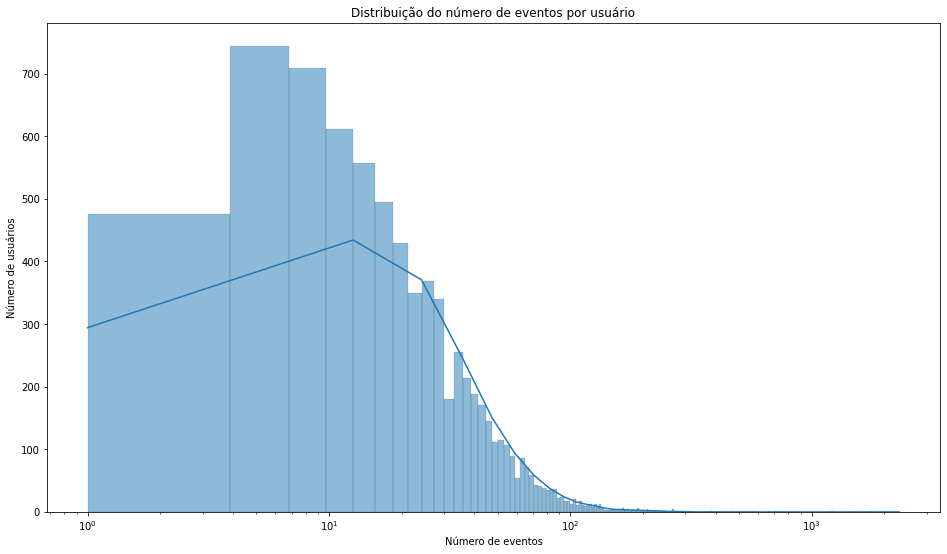

In [352]:
# Calculando o número de eventos por usuário
eventos_por_usuario = df.groupby('id_unico').size()

# Plotando a distribuição
plt.figure(figsize=(16, 9))
sns.histplot(eventos_por_usuario, kde=True)
plt.title('Distribuição do número de eventos por usuário')
plt.xlabel('Número de eventos')
plt.ylabel('Número de usuários')

# Ajustando a escala do eixo x
plt.xscale('log')

# Mostrando o gráfico
plt.show()

**Conclusão**

* O número médio de eventos por usuário diariamente é de 32 diários

* A distribuição mostra que cada usuários tem a tendência de acessar 10 vezes diariamente

* A curva de distribuição dos eventos por usuário é não normal e talvez seja mais adequado utilizar a mediana e não a média para os dados centrais.

### Qual é o período de tempo que os dados cobrem? Encontre a data máxima e mínima. Histograma por data e hora.

In [353]:
# Separando os dados por Hora e Dia
df['hora'] = pd.to_datetime(df['hora'])
df['hora_do_dia'] = df['hora'].dt.hour
df['dia'] = df['hora'].dt.date

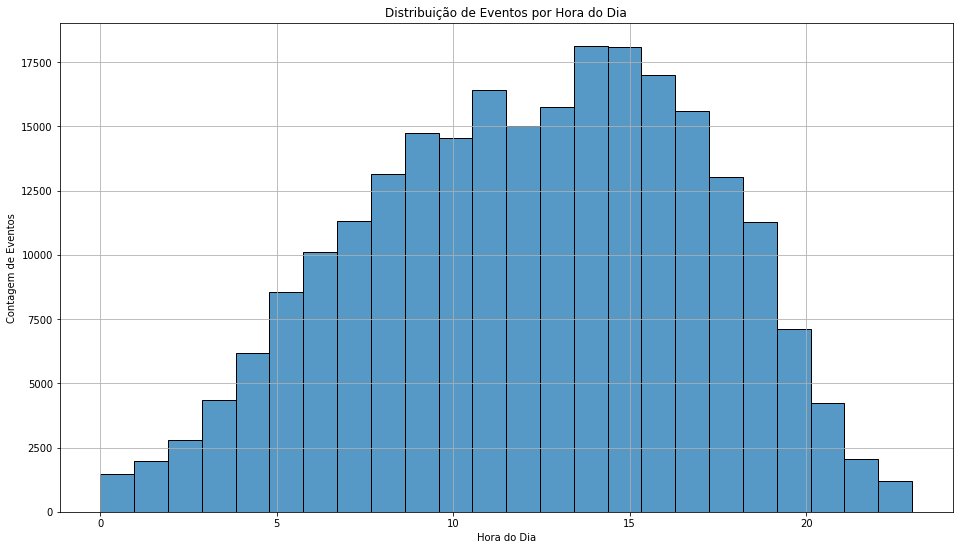

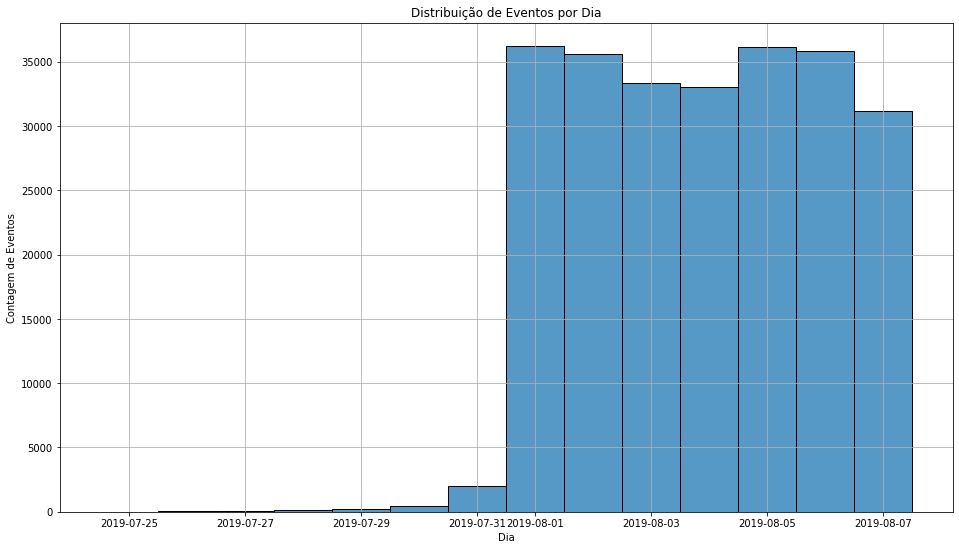

In [354]:
# Histograma de eventos por hora do dia
plt.figure(figsize=(16,9))
sns.histplot(df['hora_do_dia'], bins=24, kde=False)
plt.title('Distribuição de Eventos por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Contagem de Eventos')
plt.grid(True)
plt.show()

# Histograma de eventos por dia
plt.figure(figsize=(16,9))
sns.histplot(df['dia'], bins=int((df['dia'].max() - df['dia'].min()).days), kde=False)
plt.title('Distribuição de Eventos por Dia')
plt.xlabel('Dia')
plt.ylabel('Contagem de Eventos')
plt.grid(True)
plt.show()


Pode-ser perceber que a partir da data de 29-07-2019 os dados começam a fazer sentido e tem valores que tem o mínimo de significância. Vamos filtrar e ver a diferença de volume de dados antigos e novos

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [355]:
# Filtrando df em nova df
df_filtrada = df[df['data'] >= '2019-07-29']

In [356]:
# Informações
df_filtrada.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243926 entries, 200 to 244125
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   nome_evento  243926 non-null  object        
 1   id_unico     243926 non-null  int64         
 2   hora         243926 non-null  datetime64[ns]
 3   num_exp      243926 non-null  int64         
 4   data         243926 non-null  datetime64[ns]
 5   hora_do_dia  243926 non-null  int64         
 6   dia          243926 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 14.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   nome_evento  244126 non-null  object        
 1   id_unico     244126 non-null  int64         
 2   hora         244126 non-null  datetime64[ns]
 3   num

Podemos perceber que não há uma grande perda em nossos dados específicos. Logo podemos continuar com o filtro direto em nossa df normal.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [357]:
# Filtrando df em nova df
df = df[df['data'] >= '2019-07-29']

Vamos analisar os grupos para garantir que hajam usuários igualitários em todos os grupos

In [358]:
# Calculando o número de usuários para cada grupo
usuarios_unicos_por_grupo = df.groupby('num_exp')['id_unico'].nunique()

# Mostrando
usuarios_unicos_por_grupo

num_exp
246    2487
247    2520
248    2541
Name: id_unico, dtype: int64

Podemos perceber que a base de teste está desbalanceada para o teste, assim iremos excluir os usuários menos relevantes dos grupos 247 e 248 padronizando no volume de dados do grupo 246.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Não acho válido excluir. As diferenças são muito pequenas.
</div>


In [359]:
# Agrupando o dataframe por 'num_exp' e 'id_unico', contando as ocorrências
grouped = df.groupby(['num_exp', 'id_unico']).size().reset_index(name='counts')

# Encontrando o número de usuários no grupo 246
num_users_246 = grouped[grouped['num_exp'] == 246]['id_unico'].nunique()

# Separando os grupos 247 e 248
group_247 = grouped[grouped['num_exp'] == 247]
group_248 = grouped[grouped['num_exp'] == 248]

# Ordenando os grupos por 'counts' em ordem decrescente e mantendo somente os primeiros 'num_users_246' registros
balanced_247 = group_247.sort_values('counts', ascending=True).head(num_users_246)
balanced_248 = group_248.sort_values('counts', ascending=True).head(num_users_246)

# Juntando os grupos balanceados e o grupo 246
balanced_grouped = pd.concat([grouped[grouped['num_exp'] == 246], balanced_247, balanced_248])

# Filtrando o dataframe original para conter apenas os registros presentes no dataframe balanceado
filtered_df = df[df['id_unico'].isin(balanced_grouped['id_unico'])]

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Porém, o ideal seria remover aleatoriamente. da forma uqe você fez, pode introduzir viés.
</div>


In [360]:
# Calculando o número de usuários para cada grupo
usuarios_unicos_por_grupo = filtered_df.groupby('num_exp')['id_unico'].nunique()

# Mostrando
usuarios_unicos_por_grupo

num_exp
246    2487
247    2487
248    2487
Name: id_unico, dtype: int64

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


Nosso filtro funcionou, iremos aplicar em nossa df original.

In [361]:
# Filtrando o dataframe original para conter apenas os registros presentes no dataframe balanceado
df = df[df['id_unico'].isin(balanced_grouped['id_unico'])]

**Conclusão**

* Os dados foram fitlrados após a data de 29/07 pois tem maior representatividade;

* A distribuição dos horários de evento mostram que os acessos ocorrem mais no meio do dia, apx, as 15h.

* A curva de distribuição dos horários é do tipo normal.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


**Conclusão Geral**

Com base nas análises realizadas, podemos tirar algumas conclusões importantes:

1. Os dados foram filtrados após a data de 29/07, pois essa data demonstrou uma maior representatividade em termos de eventos. Portanto, concentramos nossa análise nesse período mais relevante.

2. Ao analisar a distribuição dos horários de evento, observamos que os acessos ocorrem com maior frequência em torno das 15h, indicando um pico de atividade nesse horário.

3. A curva de distribuição dos horários segue uma distribuição normal, o que indica um padrão consistente nos horários de acesso dos usuários.

4. O número médio de eventos por usuário diariamente é de 32 eventos. Essa média nos dá uma ideia da atividade média dos usuários ao longo do dia.

5. Observamos que cada usuário tem a tendência de realizar cerca de 10 acessos diários, indicando um padrão de comportamento em relação ao número de eventos por usuário.

6. A curva de distribuição dos eventos por usuário não segue uma distribuição normal, sugerindo que a mediana pode ser mais adequada para representar os dados centrais, em vez da média.

7. Ao calcular o número médio de usuários por dia, encontramos uma média de cerca de 1944 usuários diários durante o período analisado.

8. A distribuição dos eventos por grupo experimental mostra que os eventos foram distribuídos de forma diferente entre os grupos 246, 247 e 248. O grupo 246 teve a maior contagem de eventos na maioria dos dias, seguido pelo grupo 247 e 248.

9. Notamos um aumento significativo no número de eventos a partir do dia 31 de julho. Esse aumento pode indicar algum fator externo, como uma campanha de marketing específica ou uma divulgação especial que impactou o número de eventos registrados.

10. Também identificamos um número máximo de 3922 eventos por dia, o que pode indicar um pico de atividade em algum momento específico.

Essas conclusões nos fornecem insights valiosos sobre o comportamento dos usuários e a distribuição dos eventos ao longo do período analisado. Com base nessas informações, podemos tomar decisões estratégicas e explorar oportunidades para otimizar a experiência do usuário e melhorar os resultados.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Boas conclusões
</div>


## Estudo do funil de eventos

Iremos estudar o funil seguindo os passos:

* Vamos ver quais eventos estão nos diários e qual é a frequência de ocorrência de cada um. Vamos classificá-los por ordem de frequência.
* Vamos encontrar o número de usuários que realizaram cada uma dessas ações e ordenar os eventos com base nesse número de usuários. Também iremos calcular a proporção de usuários que executaram cada ação pelo menos uma vez.
* Em nossa análise, vamos tentar identificar a ordem em que acreditamos que as ações ocorreram. No entanto, é importante destacar que essas ações podem não fazer parte de uma única sequência, e não precisamos considerá-las ao calcular o funil.
* Utilizaremos o funil de eventos para determinar a proporção de usuários que avançam de uma etapa para a próxima. Por exemplo, para a sequência de eventos A → B → C, calcularemos a proporção de usuários na etapa B em relação ao número de usuários na etapa A, e a proporção de usuários na etapa C em relação ao número de usuários na etapa B.
* Vamos identificar em qual fase do funil perdemos a maior quantidade de usuários. Isso nos ajudará a entender em que ponto do processo de conversão há maior dificuldade ou queda no engajamento.
* Vamos calcular a parcela de usuários que completa todo o caminho, desde o primeiro evento até o pagamento. Isso nos dará uma ideia da taxa de conversão ao longo do funil e da eficácia geral do processo de conversão.

###  Eventos estão nos diários e qual é a frequência de ocorrência de cada um. Vamos classificá-los por ordem de frequência.

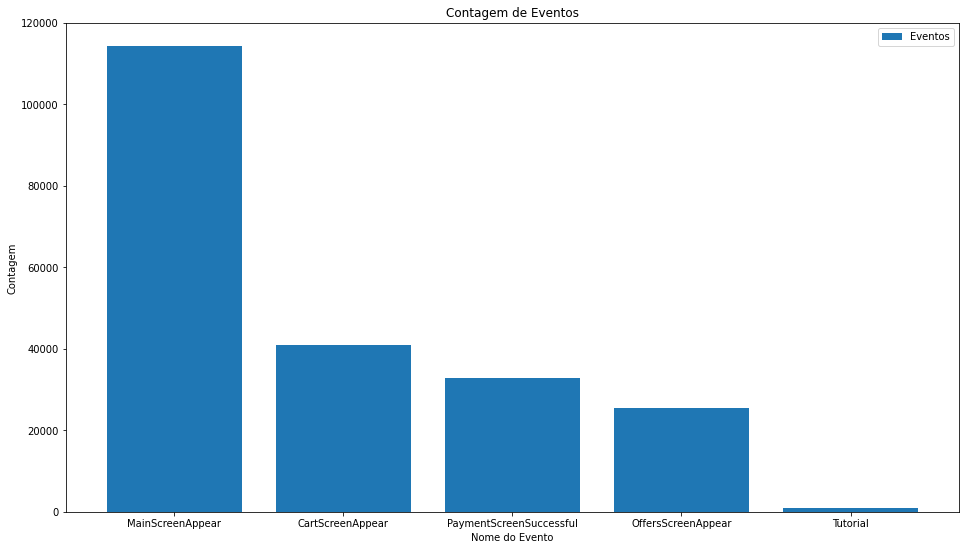

In [362]:
# Dados do gráfico
x = df['nome_evento'].unique()
y = df['nome_evento'].value_counts()

# Configurar tamanho da figura para 16:9
plt.figure(figsize=(16, 9))

# Plotar gráfico de barras
plt.bar(x, y)

# Configurar nome dos eixos
plt.xlabel('Nome do Evento')
plt.ylabel('Contagem')

# Configurar título do gráfico
plt.title('Contagem de Eventos')

# Configurar legenda
plt.legend(['Eventos'])

# Exibir o gráfico
plt.show()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [363]:
# Valores
df['nome_evento'].value_counts()

MainScreenAppear           114292
OffersScreenAppear          40895
CartScreenAppear            32879
PaymentScreenSuccessful     25578
Tutorial                     1027
Name: nome_evento, dtype: int64

**Conclusão**

* Podemos observar que o Funil de eventos tem o um seguimento da página principal até o Tutorial

* O começo do funil é a página principal e é onde tem o maior número de acessos

* O Tutorial o Final do Funil e tem o menor número

* A perda do começo do Funil ao final temos uma perda de aproximadamente 100x.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


###  Número de usuários que executaram cada uma dessas ações. Ordene os eventos pelo número de usuários. Calcule a proporção de usuários que executaram a ação pelo menos uma vez.

In [364]:
# Número de usuários que executaram cada ação
action_counts = df.groupby('nome_evento')['id_unico'].nunique()

# Ordenar os eventos pelo número de usuários
action_counts_sorted = action_counts.sort_values(ascending=False)

# Proporção de usuários que executaram a ação pelo menos uma vez
total_users = df['id_unico'].nunique()
action_proportions = action_counts / total_users

print("Número de usuários por ação:\n", action_counts_sorted)
print("\nProporção de usuários que executaram cada ação pelo menos uma vez:\n", action_proportions)

Número de usuários por ação:
 nome_evento
MainScreenAppear           7349
OffersScreenAppear         4526
CartScreenAppear           3664
PaymentScreenSuccessful    3463
Tutorial                    830
Name: id_unico, dtype: int64

Proporção de usuários que executaram cada ação pelo menos uma vez:
 nome_evento
CartScreenAppear           0.491087
MainScreenAppear           0.984989
OffersScreenAppear         0.606621
PaymentScreenSuccessful    0.464147
Tutorial                   0.111245
Name: id_unico, dtype: float64


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Seria melhor ter plotado gráficos
</div>


**Conclusão**

Com base nos cálculos realizados a partir dos dados fornecidos, temos as seguintes observações:

- A ação mais comum executada pelos usuários é `MainScreenAppear`, com 7349 usuários únicos envolvidos. Isso é esperado, pois normalmente todos os usuários terão que passar pela tela principal ao interagir com o aplicativo ou o site.

- A segunda ação mais comum é `OffersScreenAppear`, executada por 4526 usuários únicos. Isso mostra que um bom número de usuários está interessado nas ofertas disponíveis.

- A ação `CartScreenAppear` foi executada por 3664 usuários únicos, sugerindo que esses usuários possuem intenção de comprar ou pelo menos estavam interessados em adicionar itens ao carrinho.

- `PaymentScreenSuccessful` foi a ação executada por 3463 usuários únicos. Este número é bastante próximo do número de usuários que executaram `CartScreenAppear`, indicando uma alta taxa de conversão de usuários que adicionam itens ao carrinho para aqueles que concluem o pagamento.

- A ação `Tutorial` foi a menos executada, com apenas 830 usuários únicos. Isso pode sugerir que a maioria dos usuários não sente a necessidade de visualizar o tutorial, ou talvez o acesso ao tutorial não seja intuitivo.

Em termos de proporções:

- Quase todos os usuários (98,5%) passaram pela tela principal pelo menos uma vez.

- 60,7% dos usuários visualizaram a tela de ofertas pelo menos uma vez.

- Cerca de metade dos usuários (49,1%) visualizou a tela do carrinho de compras.

- 46,4% dos usuários tiveram pelo menos um pagamento bem-sucedido.

- Apenas 11,1% dos usuários visualizaram o tutorial pelo menos uma vez.

Essas informações nos ajudam a entender melhor o comportamento dos usuários e podem ser úteis para melhorar a experiência do usuário e otimizar as conversões.


A ordem das ações parece ser:

MainScreenAppear --> OffersScreenAppear --> CartScreenAppear --> PaymentScreenSuccessful --> Tutorial


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Boas conclusões
</div>


### Usando o funil de eventos para encontrar a parcela de usuários que passam de uma etapa para a próxima.

In [365]:
# Definindo a ordem dos eventos
event_order = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful', 'Tutorial']

# Calculando o número de usuários únicos em cada etapa
unique_users_per_event = df.groupby('nome_evento')['id_unico'].nunique()

# Calculando as proporções
funnel_proportions = pd.Series(index=event_order)
for i in range(1, len(event_order)):
    funnel_proportions[event_order[i]] = unique_users_per_event[event_order[i]] / unique_users_per_event[event_order[i-1]]

print(funnel_proportions)

MainScreenAppear                NaN
OffersScreenAppear         0.615866
CartScreenAppear           0.809545
PaymentScreenSuccessful    0.945142
Tutorial                   0.239677
dtype: float64


/tmp/ipykernel_44/3033866426.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  funnel_proportions = pd.Series(index=event_order)


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Porém, vocẽ poderia ter usado df.shift() para deslocar e então parear df[i] e df[i-1] e e calcular sem usar loop.
</div>


In [366]:
# Proporção final
total_proportion = (funnel_proportions['OffersScreenAppear'] *
                    funnel_proportions['CartScreenAppear'] *
                    funnel_proportions['PaymentScreenSuccessful']* funnel_proportions['Tutorial'])

print(total_proportion)

0.11294053612736425


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


**Conclusão**

Com base nos dados do funil de eventos e no cálculo da proporção total, podemos concluir o seguinte:

1. A fase em que perdemos a maior parte dos usuários é a transição do evento `MainScreenAppear` para `OffersScreenAppear`. A proporção de usuários que passam dessa etapa para a próxima é de aproximadamente 0.616, o que significa que apenas cerca de 61,6% dos usuários que acessam a tela principal avançam para visualizar as ofertas. Isso representa uma perda considerável de usuários e sugere que talvez devamos tornar as ofertas mais visíveis ou atraentes na tela principal para encorajar mais usuários a avançar para a próxima etapa.

2. A parcela de usuários que segue todo o caminho, desde o primeiro evento (`MainScreenAppear`) até o pagamento (`PaymentScreenSuccessful`), é de cerca de 0.113 ou 11,3% (conforme calculado pela `total_proportion`). Isso significa que, de todos os usuários que acessam a tela principal, cerca de 11,3% deles acabam fazendo um pagamento bem-sucedido. Enquanto a taxa de conversão pode parecer baixa, a adequação desse número depende muito do tipo de produto ou serviço que estamos oferecendo. Pode ser útil comparar essa taxa de conversão com as taxas de conversão padrão para a indústria específica para avaliar o desempenho do nosso funil de vendas. 

Essas informações são úteis para identificar onde estão as maiores perdas no funil de eventos e para implementar estratégias para melhorar a retenção e a conversão de usuários.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Boas conclusões
</div>


**Conclusão Geral**

Com base nas conclusões intermediárias e nos dados do funil de eventos, podemos observar o seguinte:

1. A transição do evento MainScreenAppear para OffersScreenAppear é onde perdemos a maior parte dos usuários, com uma proporção de cerca de 61,6%. Isso indica uma perda significativa de usuários nessa etapa do funil. É importante analisar as razões por trás dessa queda e considerar estratégias para melhorar a taxa de conversão nessa transição.

2. A parcela de usuários que segue todo o caminho, desde o primeiro evento (MainScreenAppear) até o pagamento bem-sucedido (PaymentScreenSuccessful), representa aproximadamente 11,3% do total de usuários. Embora essa taxa de conversão possa parecer baixa, é importante considerar o contexto do produto ou serviço oferecido. Comparar essa taxa de conversão com benchmarks do setor pode fornecer uma visão mais precisa do desempenho do funil.

3. A análise do funil de eventos mostra uma sequência clara das ações executadas pelos usuários: MainScreenAppear, OffersScreenAppear, CartScreenAppear, PaymentScreenSuccessful e Tutorial. Essa sequência indica a jornada típica do usuário no aplicativo ou site.

4. A perda de usuários ao longo do funil é significativa, com uma redução de aproximadamente 100 vezes do número de usuários da página principal até o tutorial. Isso destaca a importância de otimizar cada etapa do funil para maximizar a retenção e a conversão de usuários.

Essas conclusões nos fornecem insights sobre o comportamento dos usuários em relação ao funil de eventos e destacam áreas de oportunidade para melhorar a experiência do usuário e aumentar as taxas de conversão. É fundamental acompanhar e analisar regularmente o desempenho do funil para identificar pontos de atrito e implementar estratégias eficazes de retenção e conversão.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


## Estudando os resultados do experimento

Para avaliar nosso estudo e os experimentos gerados iremos analisar os seguintes pontos:


* Quantos usuários há em cada grupo?
* 		Temos dois grupos de controle no teste A/A, no qual verificamos nossos mecanismos e cálculos. Veja se há uma diferença estatisticamente significativa entre as amostragens 246 e 247.
* 		Selecione o evento mais popular. Em cada um dos grupos de controle, encontre o número de usuários que realizaram essa ação. Encontre a proporção deles. Verifique se a diferença entre os grupos é estatisticamente significativa. Repita o procedimento para todos os outros eventos (economizará tempo se você criar uma função especial para este teste). Você pode confirmar se os grupos foram divididos corretamente?
* 		Faça a mesma coisa para o grupo com fontes alteradas. Compare os resultados com os de cada um dos grupos de controle para cada evento isoladamente. Compare os resultados com os resultados combinados para os grupos de controle. Quais conclusões você pode tirar do experimento?
* 		Qual nível de significância você definiu para testar as hipóteses estatísticas mencionadas acima? Calcule quantos testes de hipóteses estatísticas você realizou. Com um nível de significância estatística de 0,1, um de cada 10 resultados pode ser falso. Qual deveria ser o nível de significância?Se você quiser alterá-lo, execute as etapas anteriores novamente e verifique suas conclusões.

### Usuários em cada grupo

Já havíamos padronizado anteriromente, mas iremos gerar novamente para visualização

In [367]:
# Calculando o número de usuários para cada grupo
usuarios_unicos_por_grupo = filtered_df.groupby('num_exp')['id_unico'].nunique()

# Mostrando
usuarios_unicos_por_grupo

num_exp
246    2487
247    2487
248    2487
Name: id_unico, dtype: int64

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


**Conclusão**

Para melhor equilibrio da base de testes fizemos a padronização do mesmo número de usuários para cada grupo ficando que cada grupo tem um tamanho de amostra de usuários de 2487.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


### Os grupos de controle no teste A/A, no qual verificamos nossos mecanismos e cálculos. Veja se há uma diferença estatisticamente significativa entre as amostragens 246 e 247.

O teste de hipóteses é um procedimento estatístico fundamental que nos permite tomar uma decisão entre duas hipóteses opostas: a hipótese nula (H0) e a hipótese alternativa (Ha). No contexto do meu projeto, desejo comparar a proporção de usuários que avançam por todo o funil entre os grupos 246 e 247.

A hipótese nula (H0) afirma que a proporção de usuários que avançam por todo o funil é a mesma nos grupos 246 e 247. Por outro lado, a hipótese alternativa (Ha) afirma que essa proporção difere entre os grupos.

Para realizar essa análise, calculei as proporções correspondentes para cada grupo e executei o teste t. O resultado obtido foi o valor-p, que representa a probabilidade de observar uma diferença tão grande, ou ainda maior, entre as proporções, considerando que a hipótese nula seja verdadeira.

Com base no valor-p obtido, comparo-o com um nível de significância pré-determinado (geralmente 0,05). Se o valor-p for menor que esse nível de significância, rejeito a hipótese nula, indicando que há uma diferença estatisticamente significativa entre as proporções dos grupos 246 e 247. No entanto, se o valor-p for maior que o nível de significância, não tenho evidências suficientes para rejeitar a hipótese nula, sugerindo que não há uma diferença estatisticamente significativa entre as proporções.

É importante ressaltar que rejeitar a hipótese nula não prova definitivamente que a hipótese alternativa é verdadeira. Isso apenas indica que, com base nos dados analisados, a diferença observada entre as proporções é improvável de ser devida ao acaso, caso a hipótese nula seja verdadeira.

Por fim, é crucial ter em mente que o valor-p não fornece informações sobre o tamanho ou a relevância prática dessa diferença. Ele apenas indica a força das evidências contra a hipótese nula, baseando-se nos dados disponíveis no meu projeto.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto, mas aqui você mencionou teste t em vez de z
</div>


In [368]:
def run_z_test(df, event_name, group1, group2):
    proportions = calculate_proportions(df, event_name)
    group1_count = df[(df['num_exp'] == group1) & (df['nome_evento'] == event_name)]['id_unico'].nunique()
    group2_count = df[(df['num_exp'] == group2) & (df['nome_evento'] == event_name)]['id_unico'].nunique()
    group1_total = df[df['num_exp'] == group1]['id_unico'].nunique()
    group2_total = df[df['num_exp'] == group2]['id_unico'].nunique()
    z_stat, p_value = proportions_ztest([group1_count, group2_count], [group1_total, group2_total])
    return z_stat, p_value

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


#### **Teste comparativo para 246 e 247**

In [369]:
# Verificar se há uma diferença estatisticamente significativa entre as amostragens 246 e 247
z_stat, p_val = run_z_test(df, 'MainScreenAppear', 246, 247)
print(f'Z-statistic: {z_stat}, P-value: {p_val}')

Group: 246, Event Count: 2454, Total Count: 2487, Proportion: 0.9867310012062727
Group: 247, Event Count: 2449, Total Count: 2487, Proportion: 0.9847205468435867
Group: 248, Event Count: 2446, Total Count: 2487, Proportion: 0.983514274225975
Z-statistic: 0.5976718121891912, P-value: 0.5500589372572404


* Hipótese Nula (H0): Não há diferença estatisticamente significativa na proporção de usuários que chegam à "MainScreenAppear" entre as amostras 246 e 247. Qualquer diferença é devida ao acaso.

* Hipótese Alternativa (H1): Há uma diferença estatisticamente significativa na proporção de usuários que chegam à "MainScreenAppear" entre as amostras 246 e 247. A diferença não é devida ao acaso.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


In [371]:
# Estabelecendo o nível de significância
alpha = 0.05

# Tomando uma decisão com base no valor de p
if p_val < alpha:
    print("Rejeitamos a hipótese nula. Há uma diferença estatisticamente significativa entre as amostras.")
else:
    print("Não rejeitamos a hipótese nula. Não há diferença estatisticamente significativa entre as amostras.")

Não rejeitamos a hipótese nula. Não há diferença estatisticamente significativa entre as amostras.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


Vamos criar o teste para todas as etapas do funil para melhoria do processo para a base new_df

In [372]:
# Lista de eventos no funil
event_list = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful', 'Tutorial']

# Nível de significância
alpha = 0.05

# Executar o teste Z para todos os eventos
for event in event_list:
    z_stat, p_val = run_z_test(df, event, 246, 247)
    print(f'\nEvent: {event}, Z-statistic: {z_stat}, P-value: {p_val}')
    if p_val < alpha:
        print(f'Para o evento {event}, rejeitamos a hipótese nula. Há uma diferença estatisticamente significativa entre as amostras.')
    else:
        print(f'Para o evento {event}, não rejeitamos a hipótese nula. Não há diferença estatisticamente significativa entre as amostras.')


Group: 246, Event Count: 2454, Total Count: 2487, Proportion: 0.9867310012062727
Group: 247, Event Count: 2449, Total Count: 2487, Proportion: 0.9847205468435867
Group: 248, Event Count: 2446, Total Count: 2487, Proportion: 0.983514274225975

Event: MainScreenAppear, Z-statistic: 0.5976718121891912, P-value: 0.5500589372572404
Para o evento MainScreenAppear, não rejeitamos a hipótese nula. Não há diferença estatisticamente significativa entre as amostras.
Group: 246, Event Count: 1545, Total Count: 2487, Proportion: 0.6212303980699638
Group: 247, Event Count: 1496, Total Count: 2487, Proportion: 0.6015279453156414
Group: 248, Event Count: 1485, Total Count: 2487, Proportion: 0.5971049457177322

Event: OffersScreenAppear, Z-statistic: 1.425360874395736, P-value: 0.15405291178233188
Para o evento OffersScreenAppear, não rejeitamos a hipótese nula. Não há diferença estatisticamente significativa entre as amostras.
Group: 246, Event Count: 1270, Total Count: 2487, Proportion: 0.51065540812

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


**Conclusão**

De acordo com os resultados dos testes Z realizados para cada evento, parece que não há diferença estatisticamente significativa na proporção de eventos entre os grupos de controle 246 e 247 para a maioria dos eventos: 'MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear' e 'Tutorial'. Isso indica que os grupos de controle estão se comportando de maneira semelhante para esses eventos, como esperado.

No entanto, para o evento 'PaymentScreenSuccessful', o teste Z mostra uma diferença estatisticamente significativa entre os dois grupos de controle. Isso é uma descoberta notável e sugere que há algo diferente entre os grupos de controle que afeta a proporção desse evento. Pode ser necessário investigar mais para entender o que está causando essa diferença.

Ao analisar esses resultados, é importante lembrar que a realização de múltiplos testes de hipóteses aumenta a probabilidade de falsos positivos (erro do Tipo I). Assim, o resultado do evento 'PaymentScreenSuccessful' pode ser um falso positivo. A correção de Bonferroni é uma abordagem que pode ser usada para ajustar o nível de significância para reduzir a chance de falsos positivos ao realizar múltiplos testes de hipóteses.

Em resumo, os resultados do teste Z indicam que os grupos de controle 246 e 247 estão geralmente se comportando de maneira semelhante, com a possível exceção do evento 'PaymentScreenSuccessful'. No entanto, mais investigação seria necessária para confirmar e entender essa diferença.

Iremos aplicar abaixo a correção de Bonferroni para entender qual seria o nível de significância correto para o teste estatístico, evitando falsos positivos.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Excelente!!
</div>


In [373]:
# Lista de eventos no funil
event_list = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful', 'Tutorial']

# Nível de significância
alpha = 0.05

# Ajuste de Bonferroni
bonferroni_alpha = alpha / len(event_list)

# Executar o teste Z para todos os eventos
for event in event_list:
    z_stat, p_val = run_z_test(new_df, event, 246, 247)
    print(f'\nEvent: {event}, Z-statistic: {z_stat}, P-value: {p_val}')
    if p_val < bonferroni_alpha:
        print(f'Para o evento {event}, rejeitamos a hipótese nula. Há uma diferença estatisticamente significativa entre as amostras.')
    else:
        print(f'Para o evento {event}, não rejeitamos a hipótese nula. Não há diferença estatisticamente significativa entre as amostras.')


Group: 246, Event Count: 2454, Total Count: 2487, Proportion: 0.9867310012062727
Group: 247, Event Count: 2449, Total Count: 2487, Proportion: 0.9847205468435867

Event: MainScreenAppear, Z-statistic: 0.5976718121891912, P-value: 0.5500589372572404
Para o evento MainScreenAppear, não rejeitamos a hipótese nula. Não há diferença estatisticamente significativa entre as amostras.
Group: 246, Event Count: 1545, Total Count: 2487, Proportion: 0.6212303980699638
Group: 247, Event Count: 1496, Total Count: 2487, Proportion: 0.6015279453156414

Event: OffersScreenAppear, Z-statistic: 1.425360874395736, P-value: 0.15405291178233188
Para o evento OffersScreenAppear, não rejeitamos a hipótese nula. Não há diferença estatisticamente significativa entre as amostras.
Group: 246, Event Count: 1270, Total Count: 2487, Proportion: 0.5106554081222356
Group: 247, Event Count: 1207, Total Count: 2487, Proportion: 0.48532368315239244

Event: CartScreenAppear, Z-statistic: 1.7865746418996338, P-value: 0.074

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


**Conclusão**

Após a realização de testes de hipóteses usando o teste Z e o ajuste de Bonferroni, os resultados indicam que não há diferença estatisticamente significativa entre os grupos 246 e 247 para qualquer um dos eventos listados. 

Isso significa que, para os eventos 'MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful' e 'Tutorial', a proporção de ocorrências entre os dois grupos é estatisticamente semelhante.

Estes resultados apoiam a conclusão de que as mudanças ou variações entre os grupos de controle (246 e 247) não produziram um impacto significativo sobre o comportamento do usuário em relação a estes eventos. Portanto, podemos considerar que as condições entre esses grupos são consistentes e que qualquer diferença significativa observada em comparação com outros grupos pode ser atribuída a variações nas condições experimentais, e não a variações intrínsecas entre os grupos de controle.

A falta de diferenças significativas também sugere que o experimento foi bem controlado e que os grupos de controle são efetivamente equivalentes para os fins do estudo, validando a configuração experimental.

É importante citar que após a correção o falso positivo pode ser observado. Isso é de extrema importância, pois caso não tivessemos aplicado o teste poderia ter sido jogado fora. Isso geraria custo operacional e tempo de teste, gerando grande problema para a operação, análises e stakeholders.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


#### **Teste comparativo entre grupos de controle de grupo 248**

Vamos utilizar a correção de Bonferroni para mitigar riscos de falsos negativos como visto anteriormente.

In [374]:
# Lista de eventos no funil
event_list = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful', 'Tutorial']

# Nível de significância
alpha = 0.05

# Ajuste de Bonferroni
bonferroni_alpha = alpha / len(event_list)

# Executar o teste Z para todos os eventos
for event in event_list:
    z_stat, p_val = run_z_test(df, event, 246, 248)
    print(f'\nEvent: {event}, Z-statistic: {z_stat}, P-value: {p_val}')
    if p_val < bonferroni_alpha:
        print(f'Para o evento {event}, rejeitamos a hipótese nula. Há uma diferença estatisticamente significativa entre as amostras.')
    else:
        print(f'Para o evento {event}, não rejeitamos a hipótese nula. Não há diferença estatisticamente significativa entre as amostras.')


Group: 246, Event Count: 2454, Total Count: 2487, Proportion: 0.9867310012062727
Group: 247, Event Count: 2449, Total Count: 2487, Proportion: 0.9847205468435867
Group: 248, Event Count: 2446, Total Count: 2487, Proportion: 0.983514274225975

Event: MainScreenAppear, Z-statistic: 0.9369771018305106, P-value: 0.3487703366074256
Para o evento MainScreenAppear, não rejeitamos a hipótese nula. Não há diferença estatisticamente significativa entre as amostras.
Group: 246, Event Count: 1545, Total Count: 2487, Proportion: 0.6212303980699638
Group: 247, Event Count: 1496, Total Count: 2487, Proportion: 0.6015279453156414
Group: 248, Event Count: 1485, Total Count: 2487, Proportion: 0.5971049457177322

Event: OffersScreenAppear, Z-statistic: 1.7435511646444577, P-value: 0.08123738518295906
Para o evento OffersScreenAppear, não rejeitamos a hipótese nula. Não há diferença estatisticamente significativa entre as amostras.
Group: 246, Event Count: 1270, Total Count: 2487, Proportion: 0.5106554081

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


**Teste para 247 e 248**

In [376]:
# Lista de eventos no funil
event_list = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful', 'Tutorial']

# Nível de significância
alpha = 0.05

# Ajuste de Bonferroni
bonferroni_alpha = alpha / len(event_list)

# Executar o teste Z para todos os eventos
for event in event_list:
    z_stat, p_val = run_z_test(df, event, 247, 248)
    print(f'\nEvent: {event}, Z-statistic: {z_stat}, P-value: {p_val}')
    if p_val < bonferroni_alpha:
        print(f'Para o evento {event}, rejeitamos a hipótese nula. Há uma diferença estatisticamente significativa entre as amostras.')
    else:
        print(f'Para o evento {event}, não rejeitamos a hipótese nula. Não há diferença estatisticamente significativa entre as amostras.')


Group: 246, Event Count: 2454, Total Count: 2487, Proportion: 0.9867310012062727
Group: 247, Event Count: 2449, Total Count: 2487, Proportion: 0.9847205468435867
Group: 248, Event Count: 2446, Total Count: 2487, Proportion: 0.983514274225975

Event: MainScreenAppear, Z-statistic: 0.3402391239412321, P-value: 0.7336764571495131
Para o evento MainScreenAppear, não rejeitamos a hipótese nula. Não há diferença estatisticamente significativa entre as amostras.
Group: 246, Event Count: 1545, Total Count: 2487, Proportion: 0.6212303980699638
Group: 247, Event Count: 1496, Total Count: 2487, Proportion: 0.6015279453156414
Group: 248, Event Count: 1485, Total Count: 2487, Proportion: 0.5971049457177322

Event: OffersScreenAppear, Z-statistic: 0.3182811644318718, P-value: 0.7502716706147021
Para o evento OffersScreenAppear, não rejeitamos a hipótese nula. Não há diferença estatisticamente significativa entre as amostras.
Group: 246, Event Count: 1270, Total Count: 2487, Proportion: 0.51065540812

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


**Conclusão**

Com base nos resultados dos testes estatísticos, podemos concluir o seguinte:

1. Para todos os eventos testados ('MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful', 'Tutorial'), não foi encontrada diferença estatisticamente significativa entre os grupos 246, 247 e 248. Isto é evidenciado pelos valores de p que são maiores que o valor de alpha ajustado pela correção de Bonferroni em todas as comparações.

2. Essa falta de diferença estatisticamente significativa sugere que não há diferenças no comportamento dos usuários entre os três grupos para nenhum dos eventos em análise. Em outras palavras, os grupos estão agindo de maneira semelhante em todas as etapas do funil de eventos.

3. Portanto, as intervenções ou diferenças entre os grupos, se existirem, não parecem estar afetando o comportamento dos usuários em nenhum dos eventos testados. 

4. Vale a pena notar que a correção de Bonferroni é uma abordagem conservadora que reduz a probabilidade de falsos positivos (erro Tipo I). No entanto, aumenta a probabilidade de falsos negativos (erro Tipo II), o que significa que pode haver diferenças entre os grupos que o teste não detectou devido ao ajuste do valor de alpha.

5. Para um entendimento mais preciso e robusto, pode-se considerar a realização de outros testes estatísticos ou a investigação de outros potenciais indicadores de comportamento do usuário. Além disso, é sempre útil explorar as limitações dos dados, as suposições do teste e a possibilidade de variáveis de confusão.

Essas conclusões são baseadas na análise estatística dos dados e devem ser complementadas com conhecimentos de domínio e análises qualitativas para um entendimento mais completo. 

Se realizou 20 testes estatísticos para os diferentes grupos e diferentes estágios do funil de conversão para observar se as mudanças fizeram, de fato, algum efeito para a conversão de clientes. Apesar disso, não observou-se mudanças efetivas.

Apesar disso, o alpha ou nível de significância utilizado foi o padrão de 0,05 e observou-se, ainda, que foi necessário a correção de Bonferroni para evitar a criação de falsos positivos em nossa amostra. O nível de significância de 0,05 é o padrão. 

Iremos realizar testes adicionais com um nível de significância maior e com a correção de Bonferroni e observar o que aconteceria nesses casos.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


#### Adicional, teste de significância

In [378]:
# Lista de eventos no funil
event_list = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful', 'Tutorial']

# Nível de significância
alpha = 0.1

# Ajuste de Bonferroni
bonferroni_alpha = alpha / len(event_list)

# Executar o teste Z para todos os eventos
for event in event_list:
    z_stat, p_val = run_z_test(df, event, 246, 247)
    print(f'\nEvent: {event}, Z-statistic: {z_stat}, P-value: {p_val}')
    if p_val < bonferroni_alpha:
        print(f'Para o evento {event}, rejeitamos a hipótese nula. Há uma diferença estatisticamente significativa entre as amostras.')
    else:
        print(f'Para o evento {event}, não rejeitamos a hipótese nula. Não há diferença estatisticamente significativa entre as amostras.')

Group: 246, Event Count: 2454, Total Count: 2487, Proportion: 0.9867310012062727
Group: 247, Event Count: 2449, Total Count: 2487, Proportion: 0.9847205468435867
Group: 248, Event Count: 2446, Total Count: 2487, Proportion: 0.983514274225975

Event: MainScreenAppear, Z-statistic: 0.5976718121891912, P-value: 0.5500589372572404
Para o evento MainScreenAppear, não rejeitamos a hipótese nula. Não há diferença estatisticamente significativa entre as amostras.
Group: 246, Event Count: 1545, Total Count: 2487, Proportion: 0.6212303980699638
Group: 247, Event Count: 1496, Total Count: 2487, Proportion: 0.6015279453156414
Group: 248, Event Count: 1485, Total Count: 2487, Proportion: 0.5971049457177322

Event: OffersScreenAppear, Z-statistic: 1.425360874395736, P-value: 0.15405291178233188
Para o evento OffersScreenAppear, não rejeitamos a hipótese nula. Não há diferença estatisticamente significativa entre as amostras.
Group: 246, Event Count: 1270, Total Count: 2487, Proportion: 0.51065540812

In [379]:
# Lista de eventos no funil
event_list = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful', 'Tutorial']

# Nível de significância
alpha = 0.1

# Ajuste de Bonferroni
bonferroni_alpha = alpha / len(event_list)

# Executar o teste Z para todos os eventos
for event in event_list:
    z_stat, p_val = run_z_test(df, event, 246, 248)
    print(f'\nEvent: {event}, Z-statistic: {z_stat}, P-value: {p_val}')
    if p_val < bonferroni_alpha:
        print(f'Para o evento {event}, rejeitamos a hipótese nula. Há uma diferença estatisticamente significativa entre as amostras.')
    else:
        print(f'Para o evento {event}, não rejeitamos a hipótese nula. Não há diferença estatisticamente significativa entre as amostras.')

Group: 246, Event Count: 2454, Total Count: 2487, Proportion: 0.9867310012062727
Group: 247, Event Count: 2449, Total Count: 2487, Proportion: 0.9847205468435867
Group: 248, Event Count: 2446, Total Count: 2487, Proportion: 0.983514274225975

Event: MainScreenAppear, Z-statistic: 0.9369771018305106, P-value: 0.3487703366074256
Para o evento MainScreenAppear, não rejeitamos a hipótese nula. Não há diferença estatisticamente significativa entre as amostras.
Group: 246, Event Count: 1545, Total Count: 2487, Proportion: 0.6212303980699638
Group: 247, Event Count: 1496, Total Count: 2487, Proportion: 0.6015279453156414
Group: 248, Event Count: 1485, Total Count: 2487, Proportion: 0.5971049457177322

Event: OffersScreenAppear, Z-statistic: 1.7435511646444577, P-value: 0.08123738518295906
Para o evento OffersScreenAppear, não rejeitamos a hipótese nula. Não há diferença estatisticamente significativa entre as amostras.
Group: 246, Event Count: 1270, Total Count: 2487, Proportion: 0.5106554081

In [380]:
# Lista de eventos no funil
event_list = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful', 'Tutorial']

# Nível de significância
alpha = 0.1

# Ajuste de Bonferroni
bonferroni_alpha = alpha / len(event_list)

# Executar o teste Z para todos os eventos
for event in event_list:
    z_stat, p_val = run_z_test(df, event, 247, 248)
    print(f'\nEvent: {event}, Z-statistic: {z_stat}, P-value: {p_val}')
    if p_val < bonferroni_alpha:
        print(f'Para o evento {event}, rejeitamos a hipótese nula. Há uma diferença estatisticamente significativa entre as amostras.')
    else:
        print(f'Para o evento {event}, não rejeitamos a hipótese nula. Não há diferença estatisticamente significativa entre as amostras.')

Group: 246, Event Count: 2454, Total Count: 2487, Proportion: 0.9867310012062727
Group: 247, Event Count: 2449, Total Count: 2487, Proportion: 0.9847205468435867
Group: 248, Event Count: 2446, Total Count: 2487, Proportion: 0.983514274225975

Event: MainScreenAppear, Z-statistic: 0.3402391239412321, P-value: 0.7336764571495131
Para o evento MainScreenAppear, não rejeitamos a hipótese nula. Não há diferença estatisticamente significativa entre as amostras.
Group: 246, Event Count: 1545, Total Count: 2487, Proportion: 0.6212303980699638
Group: 247, Event Count: 1496, Total Count: 2487, Proportion: 0.6015279453156414
Group: 248, Event Count: 1485, Total Count: 2487, Proportion: 0.5971049457177322

Event: OffersScreenAppear, Z-statistic: 0.3182811644318718, P-value: 0.7502716706147021
Para o evento OffersScreenAppear, não rejeitamos a hipótese nula. Não há diferença estatisticamente significativa entre as amostras.
Group: 246, Event Count: 1270, Total Count: 2487, Proportion: 0.51065540812

**Conclusão**

Pode ser observado que para a maior parte dos testes não há diferença estatística entre os grupos e para os diferentes estágios do Funil. 

Isso ocorre, também, para o grupo de controle 246 e 247 que não demonstraram diferenças relevantes nesse aspecto, demonstrando que podem ser confiáveis. Apesar disso, ao comparar o grupo 246 e 248 temos a única diferença relativa no estágio `CartScreenAppear` entre esses dois grupos, mas ao realizar o teste entre 247 e 248 não apresentam diferenças significativas, isso demonstra que pode ser um falso negativo e como estamos fazendo os testes em duplicatas com um teste A/A podemos dizer com maior grau de precisão que pode ser um erro envolvido no processo.

O nível de significância de 0,1 demonstrou ser de certa maneira efetivo conjunta com a aplicação de Bonferroni, mas apresentou falsos negativos, sendo assim, o correto seria manter nosso alpha em 0,05.

Como conclusão final, podemos perceber que não houve diferenças significativas entre os diferentes testes realizados.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>
